In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
pol = pd.read_csv("PurchaseOrderLine.csv", usecols = ["EarlyDeliveryDate", "Quantity", "CancelQuantity", "PurchaseOrder", "Item"])

In [3]:
porl = pd.read_csv("PurchaseOrderReceiptLine.csv", usecols = ["ReceivedDate", "PurchaseOrder", "EnteredReceivedQuantity", "Item", "Vendor", "Description"])

In [4]:
vrl = pd.read_csv("VendorReturnLine.csv", usecols = ['VendorReturn', 'Vendor', 'OriginalPurchaseOrder', 'Item', 'ItemType','ReturnQuantity'])

In [5]:
# Checking the number of records and features
print(pol.shape, porl.shape, vrl.shape)
# porl has the minimum, have to match according to porl

(4153, 5) (1503, 6) (42, 6)


In [6]:
pol

,PurchaseOrder,Item,Quantity,EarlyDeliveryDate,CancelQuantity
0,1,9,10.0,11/29/2016,0
1,2,15,1.0,12/3/2016,0
2,3,16,1.0,12/5/2016,0
3,4,MARQUE CURVED DOUBLE RECEPTION S,1.0,12/8/2016,0
4,5,1,1.0,12/8/2016,0
...,...,...,...,...,...
4148,3709,A482032,1.0,10/1/2019,0
4149,3710,B405962,1.0,10/8/2019,0
4150,3711,B405962,1.0,11/7/2019,0
4151,3712,B405962,1.0,11/7/2019,0


In [7]:
porl

,PurchaseOrder,Item,Description,EnteredReceivedQuantity,ReceivedDate,Vendor
0,1,9,SCREW BN CANC TI FT 6.5 X 25,10,11/29/2016,8
1,2,15,PORTABLE X-RAY MACHINE,1,12-03-2016,6
2,3,16,XPS 15,1,12-06-2016,3
3,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1,12-08-2016,2
4,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1,12/14/2016,8
...,...,...,...,...,...,...
1498,3240,70,24X24X2 FILTER,1,5/18/2020,1003
1499,3375,720461,Office Depot(R) Brand Transparent Plastic Rule...,1,5/18/2020,2
1500,3418,323116,"Office Depot(R) Brand Stainless Steel Ruler, 12",1,5/18/2020,2
1501,3516,SP100-NC,hhhhh,1,5/18/2020,8


In [8]:
pol.dtypes

PurchaseOrder          int64
Item                  object
Quantity             float64
EarlyDeliveryDate     object
CancelQuantity         int64
dtype: object

In [9]:
porl.dtypes

PurchaseOrder               int64
Item                       object
Description                object
EnteredReceivedQuantity     int64
ReceivedDate               object
Vendor                      int64
dtype: object

In [10]:
# new will be the compiled dataset
new = porl

In [11]:
new.head()

,PurchaseOrder,Item,Description,EnteredReceivedQuantity,ReceivedDate,Vendor
0,1,9,SCREW BN CANC TI FT 6.5 X 25,10,11/29/2016,8
1,2,15,PORTABLE X-RAY MACHINE,1,12-03-2016,6
2,3,16,XPS 15,1,12-06-2016,3
3,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1,12-08-2016,2
4,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1,12/14/2016,8


In [12]:
pol.head()

,PurchaseOrder,Item,Quantity,EarlyDeliveryDate,CancelQuantity
0,1,9,10.0,11/29/2016,0
1,2,15,1.0,12/3/2016,0
2,3,16,1.0,12/5/2016,0
3,4,MARQUE CURVED DOUBLE RECEPTION S,1.0,12/8/2016,0
4,5,1,1.0,12/8/2016,0


In [13]:
# Adding the remainder columns to join the two dfs
new['Quantity'] = np.nan
new['EarlyDeliveryDate'] = np.nan
new['CancelQuantity'] = np.nan

In [14]:
new.head()

,PurchaseOrder,Item,Description,EnteredReceivedQuantity,ReceivedDate,Vendor,Quantity,EarlyDeliveryDate,CancelQuantity
0,1,9,SCREW BN CANC TI FT 6.5 X 25,10,11/29/2016,8,NaN,NaN,NaN
1,2,15,PORTABLE X-RAY MACHINE,1,12-03-2016,6,NaN,NaN,NaN
2,3,16,XPS 15,1,12-06-2016,3,NaN,NaN,NaN
3,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1,12-08-2016,2,NaN,NaN,NaN
4,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1,12/14/2016,8,NaN,NaN,NaN


In [15]:
for i in new.index:
    try:
        new.iloc[i, 6] = pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['Quantity']
        new.iloc[i, 7] = pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['EarlyDeliveryDate']
        new.iloc[i, 8] = pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['CancelQuantity']
    except ValueError:
        if len(pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['Quantity']) != 0:
            new.iloc[i, 6] = pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['Quantity'][pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['Quantity'].first_valid_index()]
            new.iloc[i, 7] = pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['EarlyDeliveryDate'][pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['EarlyDeliveryDate'].first_valid_index()]
            new.iloc[i, 8] = pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['CancelQuantity'][pol[(pol['PurchaseOrder'] == new['PurchaseOrder'][i]) & (pol['Item'] == new['Item'][i])]['CancelQuantity'].first_valid_index()]
# ValueError for when corresponding records aren't there in porl

In [16]:
new.head()

,PurchaseOrder,Item,Description,EnteredReceivedQuantity,ReceivedDate,Vendor,Quantity,EarlyDeliveryDate,CancelQuantity
0,1,9,SCREW BN CANC TI FT 6.5 X 25,10,11/29/2016,8,10.0,11/29/2016,0.0
1,2,15,PORTABLE X-RAY MACHINE,1,12-03-2016,6,1.0,12/3/2016,0.0
2,3,16,XPS 15,1,12-06-2016,3,1.0,12/5/2016,0.0
3,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1,12-08-2016,2,1.0,12/8/2016,0.0
4,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1,12/14/2016,8,1.0,12/16/2016,0.0


In [17]:
new.isnull().sum()
# 1 null record

PurchaseOrder              0
Item                       0
Description                0
EnteredReceivedQuantity    0
ReceivedDate               0
Vendor                     0
Quantity                   1
EarlyDeliveryDate          1
CancelQuantity             1
dtype: int64

In [18]:
new[new['Quantity'].isnull()]
# corresponds to PurchaseOrder equals 303

,PurchaseOrder,Item,Description,EnteredReceivedQuantity,ReceivedDate,Vendor,Quantity,EarlyDeliveryDate,CancelQuantity
70,303,3.63323E+11,FLUPHENAZINE DECANOATE,15,7/24/2017,1,NaN,NaN,NaN


In [19]:
# Checking PurchaseOrder equals 303 in pol
pol[pol['PurchaseOrder'] == 303]

,PurchaseOrder,Item,Quantity,EarlyDeliveryDate,CancelQuantity
211,303,363323272050,20.0,7/24/2017,0
212,303,4161693144,20.0,7/24/2017,0


In [20]:
# new's record number 70 is basically pol's record number 211
new[new['CancelQuantity'].isnull()]['Item']

70    3.63323E+11
Name: Item, dtype: object

In [21]:
new.iloc[70, 6] = pol.iloc[211, 2]
new.iloc[70, 7] = pol.iloc[211, 3]
new.iloc[70, 8] = pol.iloc[211, 4]

In [22]:
new.isnull().sum()

PurchaseOrder              0
Item                       0
Description                0
EnteredReceivedQuantity    0
ReceivedDate               0
Vendor                     0
Quantity                   0
EarlyDeliveryDate          0
CancelQuantity             0
dtype: int64

In [23]:
new['QuantityDemandedFinal'] = new['Quantity'] - new['CancelQuantity']

In [24]:
new['ReceivedDate'] = pd.to_datetime(new['ReceivedDate'])
new['EarlyDeliveryDate'] = pd.to_datetime(new['EarlyDeliveryDate'])

In [25]:
new['DeliveryTime'] = new['EarlyDeliveryDate'] - new['ReceivedDate']

In [26]:
new['DeliveryTime'] = new['DeliveryTime'].dt.days

In [27]:
# Reordering the columns
new = new[['Vendor', 'PurchaseOrder', 'Item', 'Description', 'Quantity', 'CancelQuantity', 
            'QuantityDemandedFinal', 'EnteredReceivedQuantity',
            'EarlyDeliveryDate', 'ReceivedDate', 'DeliveryTime']]

In [28]:
new.head()

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime
0,8,1,9,SCREW BN CANC TI FT 6.5 X 25,10.0,0.0,10.0,10,2016-11-29,2016-11-29,0
1,6,2,15,PORTABLE X-RAY MACHINE,1.0,0.0,1.0,1,2016-12-03,2016-12-03,0
2,3,3,16,XPS 15,1.0,0.0,1.0,1,2016-12-05,2016-12-06,-1
3,2,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1.0,0.0,1.0,1,2016-12-08,2016-12-08,0
4,8,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1.0,0.0,1.0,1,2016-12-16,2016-12-14,2


In [29]:
print("Total number of Vendors are: " + str(len(new['Vendor'].unique())))
print("Vendor IDs :-")
print(*new['Vendor'].unique(), sep = ', ')

Total number of Vendors are: 30
Vendor IDs :-
8, 6, 3, 2, 1, 5, 1005, 1006, 1021, 4, 1003, 1012, 9, 1036, 1042, 1043, 1044, 1027, 1045, 1046, 1113, 1029, 1034, 7, 1130, 1128, 1007, 1133, 1136, 1025


In [30]:
vendors, counts = np.unique(new['Vendor'], return_counts = True)

In [31]:
for vendor, count in zip(vendors, counts):
    print(str(vendor) + ": " + str(count))
# implies majority of the orders are taken up by vendor #1, #8, #5, #2

1: 582
2: 113
3: 42
4: 35
5: 140
6: 19
7: 9
8: 417
9: 2
1003: 59
1005: 2
1006: 2
1007: 1
1012: 1
1021: 5
1025: 2
1027: 2
1029: 1
1034: 17
1036: 6
1042: 1
1043: 1
1044: 1
1045: 1
1046: 1
1113: 2
1128: 30
1130: 5
1133: 2
1136: 2


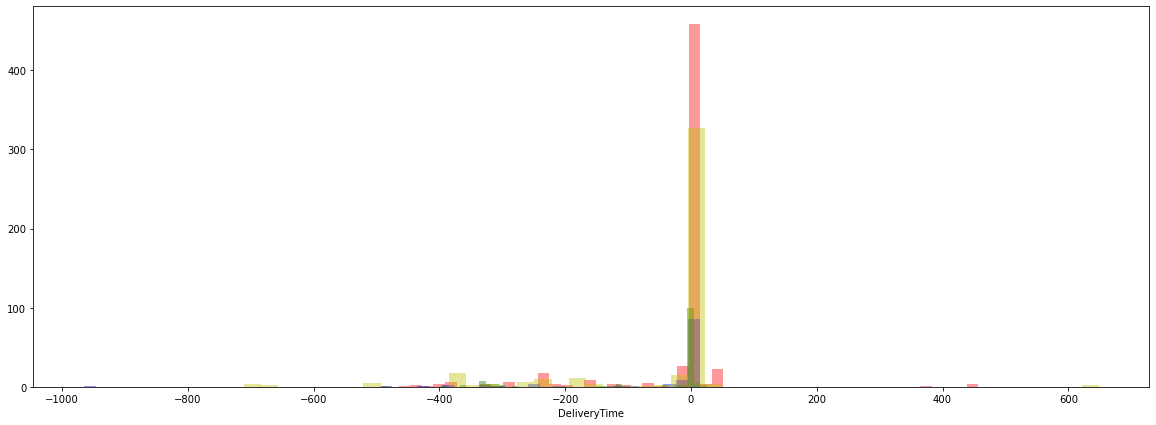

In [32]:
# to see which vendor delivers early/late generally
plt.figure(figsize = (20,7))
sns.distplot(new[new['Vendor'] == 1]['DeliveryTime'], kde = False, color = 'r') #1
sns.distplot(new[new['Vendor'] == 2]['DeliveryTime'], kde = False, color = 'b')  #2
sns.distplot(new[new['Vendor'] == 5]['DeliveryTime'], kde = False, color = 'g')  #3
sns.distplot(new[new['Vendor'] == 8]['DeliveryTime'], kde = False, color = 'y') #4 #worst

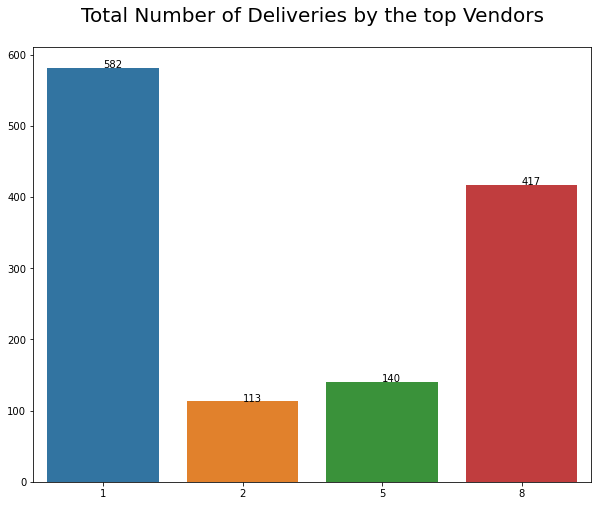

In [33]:
plt.figure(figsize = (10,8))
top_vendors = [1,2,5,8]
number1 = new[(new['Vendor'] == 1)].shape[0]
number2 = new[(new['Vendor'] == 2)].shape[0]
number5 = new[(new['Vendor'] == 5)].shape[0]
number8 = new[(new['Vendor'] == 8)].shape[0]
top_vendors_numbers = [number1, number2, number5, number8]
ax = sns.barplot(x = top_vendors, y = top_vendors_numbers)
for i, value in enumerate(top_vendors_numbers):
    ax.text(i, value, value)
plt.title("Total Number of Deliveries by the top Vendors", fontdict = {'fontsize':20}, pad = 25)
plt.show()

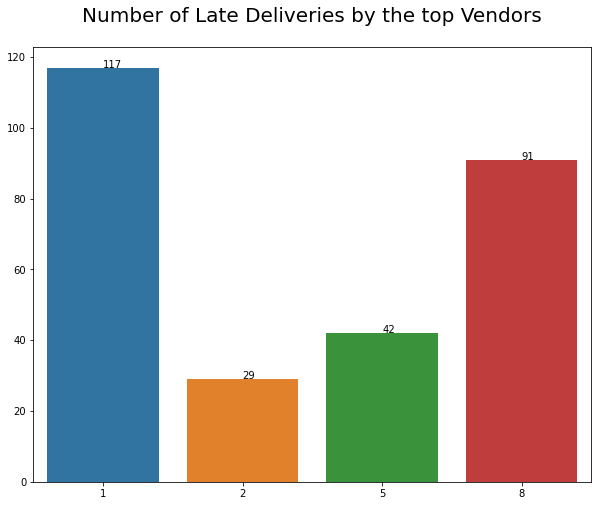

In [34]:
plt.figure(figsize = (10,8))
top_vendors = [1,2,5,8]
late1 = new[(new['Vendor'] == 1) & (new['DeliveryTime'] <0)].shape[0]
late2 = new[(new['Vendor'] == 2) & (new['DeliveryTime'] <0)].shape[0]
late5 = new[(new['Vendor'] == 5) & (new['DeliveryTime'] <0)].shape[0]
late8 = new[(new['Vendor'] == 8) & (new['DeliveryTime'] <0)].shape[0]
top_vendors_latenumbers = [late1, late2, late5, late8]
ax = sns.barplot(x = top_vendors, y = top_vendors_latenumbers)
for i, value in enumerate(top_vendors_latenumbers):
    ax.text(i, value, value)
plt.title("Number of Late Deliveries by the top Vendors", fontdict = {'fontsize':20}, pad = 25)
plt.show()

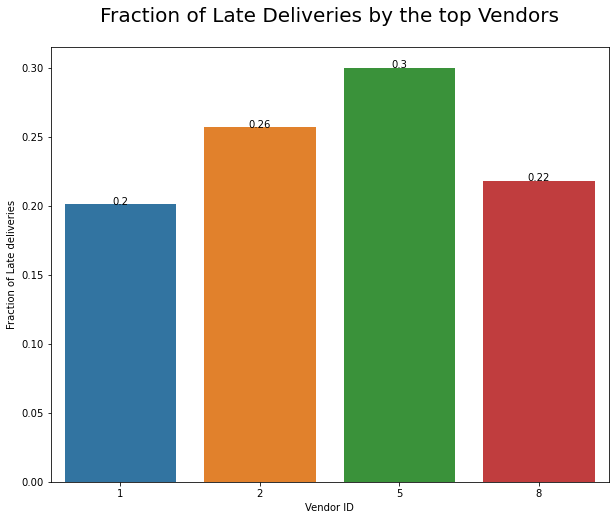

In [35]:
# fraction of late deliveries by each of these popular vendors
plt.figure(figsize = (10,8))
tfrac1 = new[(new['Vendor'] == 1) & (new['DeliveryTime'] < 0)].shape[0]/new[new['Vendor'] == 1].shape[0]
tfrac2 = new[(new['Vendor'] == 2) & (new['DeliveryTime'] < 0)].shape[0]/new[new['Vendor'] == 2].shape[0]
tfrac5 = new[(new['Vendor'] == 5) & (new['DeliveryTime'] < 0)].shape[0]/new[new['Vendor'] == 5].shape[0]
tfrac8 = new[(new['Vendor'] == 8) & (new['DeliveryTime'] < 0)].shape[0]/new[new['Vendor'] == 8].shape[0]

top_vendors_latefracs = [tfrac1, tfrac2, tfrac5, tfrac8]
ax = sns.barplot(x = top_vendors, y = top_vendors_latefracs)
for i, value in enumerate(top_vendors_latefracs):
    ax.text(i, value, round(value ,2), color='black', ha = "center")
plt.xlabel("Vendor ID")
plt.ylabel("Fraction of Late deliveries")
plt.title("Fraction of Late Deliveries by the top Vendors", fontdict = {'fontsize':20}, pad = 25)
plt.show()

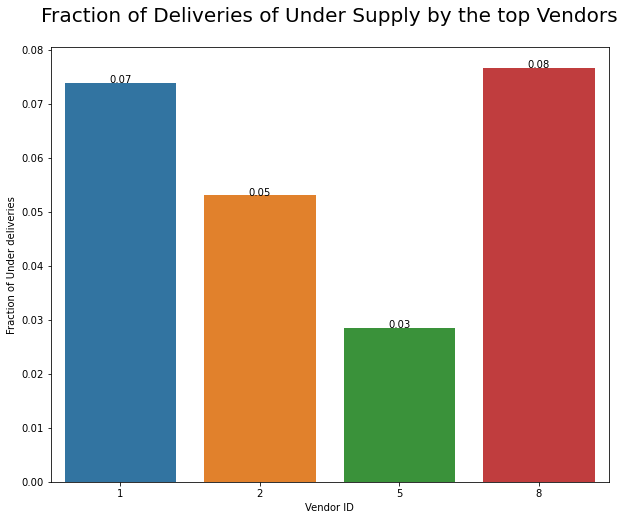

In [36]:
# fraction of late deliveries by each of these popular vendors
plt.figure(figsize = (10,8))
qnfrac1 = new[(new['Vendor'] == 1) & (new['EnteredReceivedQuantity'] < new['QuantityDemandedFinal'])].shape[0]/new[new['Vendor'] == 1].shape[0]
qnfrac2 = new[(new['Vendor'] == 2) & (new['EnteredReceivedQuantity'] < new['QuantityDemandedFinal'])].shape[0]/new[new['Vendor'] == 2].shape[0]
qnfrac5 = new[(new['Vendor'] == 5) & (new['EnteredReceivedQuantity'] < new['QuantityDemandedFinal'])].shape[0]/new[new['Vendor'] == 5].shape[0]
qnfrac8 = new[(new['Vendor'] == 8) & (new['EnteredReceivedQuantity'] < new['QuantityDemandedFinal'])].shape[0]/new[new['Vendor'] == 8].shape[0]

top_vendors_qnfracs = [qnfrac1, qnfrac2, qnfrac5, qnfrac8]
ax = sns.barplot(x = top_vendors, y = top_vendors_qnfracs)
for i, value in enumerate(top_vendors_qnfracs):
    ax.text(i, value, round(value ,2), color='black', ha = "center")
plt.xlabel("Vendor ID")
plt.ylabel("Fraction of Under deliveries")
plt.title("Fraction of Deliveries of Under Supply by the top Vendors", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [37]:
# Time to add returns into the compiled dataset
new['ReturnQuantity'] = 0
new.head()

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime,ReturnQuantity
0,8,1,9,SCREW BN CANC TI FT 6.5 X 25,10.0,0.0,10.0,10,2016-11-29,2016-11-29,0,0
1,6,2,15,PORTABLE X-RAY MACHINE,1.0,0.0,1.0,1,2016-12-03,2016-12-03,0,0
2,3,3,16,XPS 15,1.0,0.0,1.0,1,2016-12-05,2016-12-06,-1,0
3,2,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1.0,0.0,1.0,1,2016-12-08,2016-12-08,0,0
4,8,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1.0,0.0,1.0,1,2016-12-16,2016-12-14,2,0


In [38]:
column = new.columns.get_loc('ReturnQuantity')
problem = []
for i in range(vrl.shape[0]):
    # index/record in the PurchaseOrder dataset is mached with following attributes:
    # 1. PurchaseOrder Number
    # 2. Item
    # 3. That particular Items' received quantity is greater than the quantity that is returned
    index = new[(new['PurchaseOrder'] == vrl['OriginalPurchaseOrder'][i])  & (new['Item'] == vrl['Item'][i]) & (new['EnteredReceivedQuantity'] >= vrl['ReturnQuantity'][i])].index
    if len(index == 1):
        new.iloc[index, column] = vrl['ReturnQuantity'][i]
    else: # if there isn't any record as such, or are multiple records
        problem.append(i)
print("These were the indices in the VendorReturnLine table that don't have any corresponding PurchaseOrder")
print(*problem, sep=', ')

These were the indices in the VendorReturnLine table that don't have any corresponding PurchaseOrder
17, 18, 19, 20, 22, 41


In [39]:
vrl.iloc[[17,18,19,20,22,41], :]

,VendorReturn,Vendor,OriginalPurchaseOrder,Item,ItemType,ReturnQuantity
17,23,1,0,13,I,15
18,24,9,0,4161693144,N,2
19,25,1,0,1,I,3
20,26,1,0,1,I,1
22,28,1,0,21,N,5
41,56,1128,0,10005,X,1


In [40]:
# after analysis through the spreadsheet using various other features, OriginalPurchaseOrders for these records are:
vrl.iloc[17,2] = 824
vrl.iloc[18,2] = 303
vrl.iloc[19,2] = 1347
vrl.iloc[20,2] = 1422
vrl.iloc[22,2] = 1381
vrl.iloc[41,2] = 2923
vrl.iloc[[17,18,19,20,22,41], :]

,VendorReturn,Vendor,OriginalPurchaseOrder,Item,ItemType,ReturnQuantity
17,23,1,824,13,I,15
18,24,9,303,4161693144,N,2
19,25,1,1347,1,I,3
20,26,1,1422,1,I,1
22,28,1,1381,21,N,5
41,56,1128,2923,10005,X,1


In [41]:
# modifying these in the compiled dataset
for i, index in enumerate(problem):
        # index/record in the PurchaseOrder dataset is mached with following attributes:
        # 1. PurchaseOrder Number
        # 2. Item
        # 3. That particular Items' received quantity is greater than the quantity that is returned
        index = new[(new['PurchaseOrder'] == vrl['OriginalPurchaseOrder'][i])  & (new['Item'] == vrl['Item'][i]) & (new['EnteredReceivedQuantity'] >= vrl['ReturnQuantity'][i])].index
        if len(index == 1):
            new.iloc[index, column] = vrl['ReturnQuantity'][i]
        else: # if there isn't any record as such, or are multiple records
            problem.append(i)
print(*problem, sep =', ') # nothing new added, hence problem is solved

17, 18, 19, 20, 22, 41


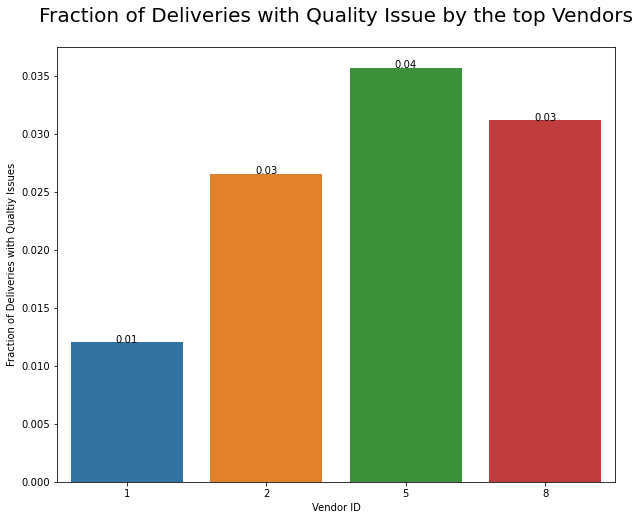

In [42]:
# fraction of late deliveries by each of these popular vendors
plt.figure(figsize = (10,8))
qlfrac1 = new[(new['Vendor'] == 1) & (new['ReturnQuantity'] > 0)].shape[0]/new[new['Vendor'] == 1].shape[0]
qlfrac2 = new[(new['Vendor'] == 2) & (new['ReturnQuantity'] > 0)].shape[0]/new[new['Vendor'] == 2].shape[0]
qlfrac5 = new[(new['Vendor'] == 5) & (new['ReturnQuantity'] > 0)].shape[0]/new[new['Vendor'] == 5].shape[0]
qlfrac8 = new[(new['Vendor'] == 8) & (new['ReturnQuantity'] > 0)].shape[0]/new[new['Vendor'] == 8].shape[0]

top_vendors_qlfracs = [qlfrac1, qlfrac2, qlfrac5, qlfrac8]
ax = sns.barplot(x = top_vendors, y = top_vendors_qlfracs)
for i, value in enumerate(top_vendors_qlfracs):
    ax.text(i, value, round(value ,2), color='black', ha = "center")
plt.xlabel("Vendor ID")
plt.ylabel("Fraction of Deliveries with Qualtiy Issues")
plt.title("Fraction of Deliveries with Quality Issue by the top Vendors", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [43]:
new['PercentQuantityReceived'] = new['EnteredReceivedQuantity']/new['QuantityDemandedFinal']

In [44]:
new[new['PercentQuantityReceived'] > 1].head()
# these are the instances of oversupply
# dealing with these by equating them with undersupply

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime,ReturnQuantity,PercentQuantityReceived
102,1,373,21,URINE AND STOOL COLLECTION PAN,5.0,0.0,5.0,10,2017-08-10,2017-08-07,3,0,2.0
105,1,325,21,URINE AND STOOL COLLECTION PAN,5.0,0.0,5.0,15,2017-08-05,2017-08-08,-3,0,3.0
139,1,423,21,URINE AND STOOL COLLECTION PAN,5.0,0.0,5.0,10,2017-08-14,2017-08-15,-1,0,2.0
269,8,765,31,STEM HIP FITMORE A SIZE 7,5.0,0.0,5.0,7,2017-10-12,2017-10-12,0,0,1.4
272,8,767,31,STEM HIP FITMORE A SIZE 7,5.0,0.0,5.0,7,2017-10-12,2017-10-12,0,0,1.4


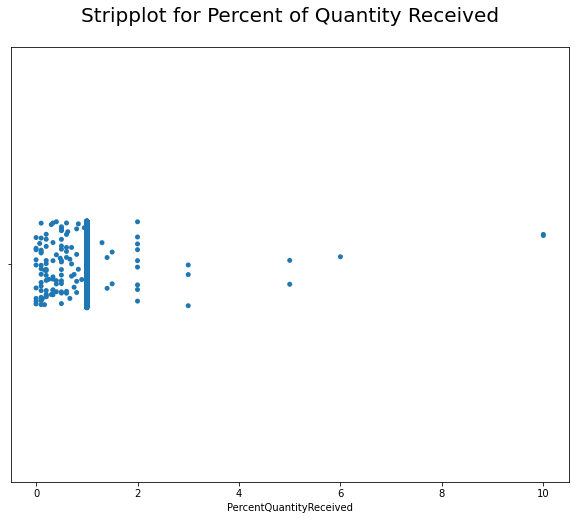

In [45]:
plt.figure(figsize = (10,8))
sns.stripplot(new['PercentQuantityReceived'])
plt.title("Stripplot for Percent of Quantity Received", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [46]:
xmin = 1
xmax = np.max(new['PercentQuantityReceived'])
xrange = xmax - xmin

In [47]:
column = new.columns.get_loc("PercentQuantityReceived")
for index, row in new[new['PercentQuantityReceived'] > 1].iterrows():
        new.iloc[index, column] = 1 - (new.iloc[index, column] - xmin)/(xrange)

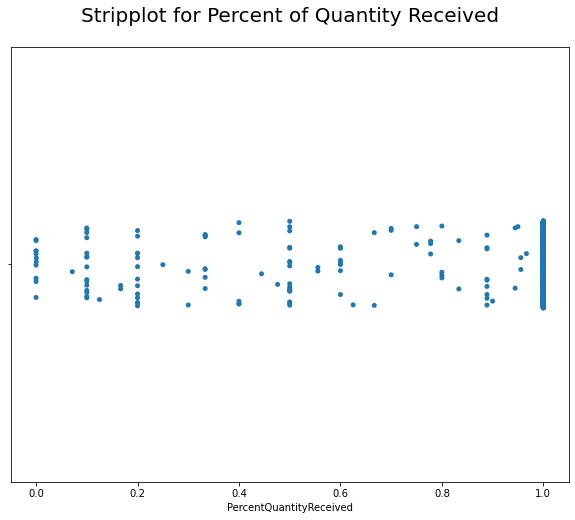

In [48]:
plt.figure(figsize = (10,8))
sns.stripplot(new['PercentQuantityReceived'])
plt.title("Stripplot for Percent of Quantity Received", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [49]:
new['PercentQuantityKept'] = 1 - new['ReturnQuantity']/new['EnteredReceivedQuantity']

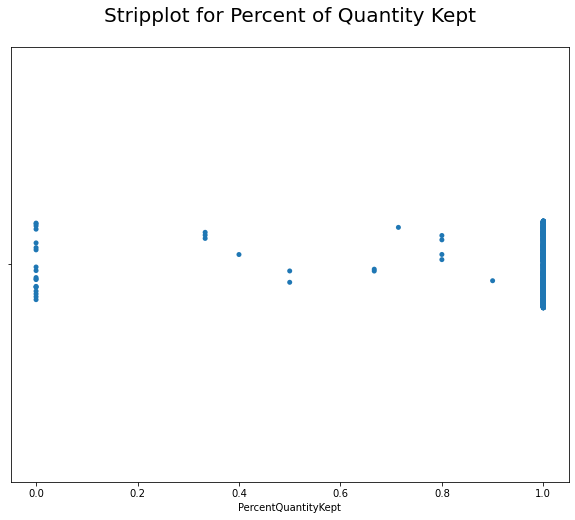

In [50]:
plt.figure(figsize = (10,8))
sns.stripplot(new['PercentQuantityKept'])
plt.title("Stripplot for Percent of Quantity Kept", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [51]:
new['DeliveryTime'] = new['EarlyDeliveryDate'] - new['ReceivedDate']
new['DeliveryTime'] = new['DeliveryTime'].dt.days

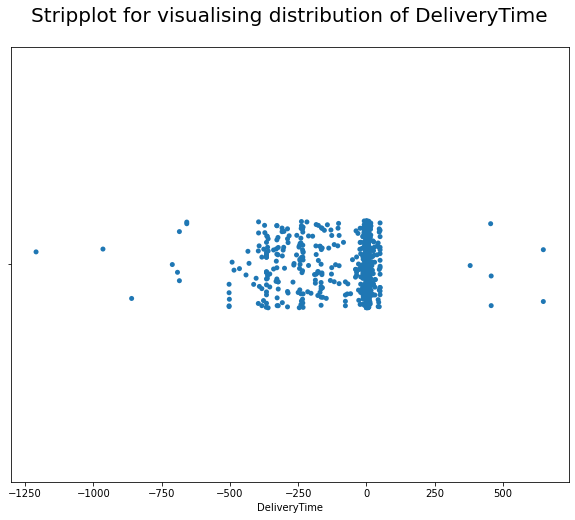

In [52]:
plt.figure(figsize = (10,8))
sns.stripplot(new['DeliveryTime'])
plt.title("Stripplot for visualising distribution of DeliveryTime", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [53]:
# this is for equating early delivery with late delivery
# it based on an assumption that 10 days of early delivery would be equivalent to 1 day o
def equate(time):
    if time > 0:
        time = -(time/10)
    return time
new['NormDeliveryTime'] = new['DeliveryTime'].apply(equate)

In [54]:
new[new['DeliveryTime'] > 0].shape[0]

548

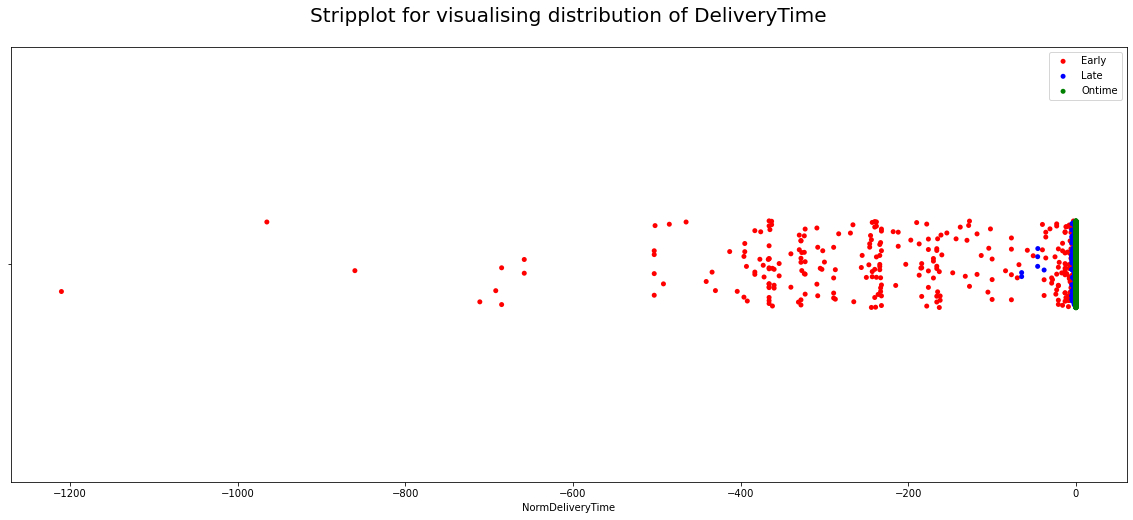

In [55]:
plt.figure(figsize = (20,8))
sns.stripplot(new[new['DeliveryTime'] < 0]['NormDeliveryTime'], color = 'red')
sns.stripplot(new[new['DeliveryTime'] > 0]['NormDeliveryTime'], color = 'blue')
sns.stripplot(new[new['DeliveryTime'] == 0]['NormDeliveryTime'], color = 'green')
plt.title("Stripplot for visualising distribution of DeliveryTime", fontdict = {'fontsize':20}, pad = 25)
plt.legend(['Early', 'Late', 'Ontime'])
plt.show()

In [56]:
#normalising the delivery time:
dmin = np.min(new['NormDeliveryTime'])
dmax = np.max(new['NormDeliveryTime'])
drange = dmax - dmin
column = new.columns.get_loc("NormDeliveryTime")
for index in range(new.shape[0]):
    new.iloc[index, column] = (new.iloc[index, column] - dmin)/drange

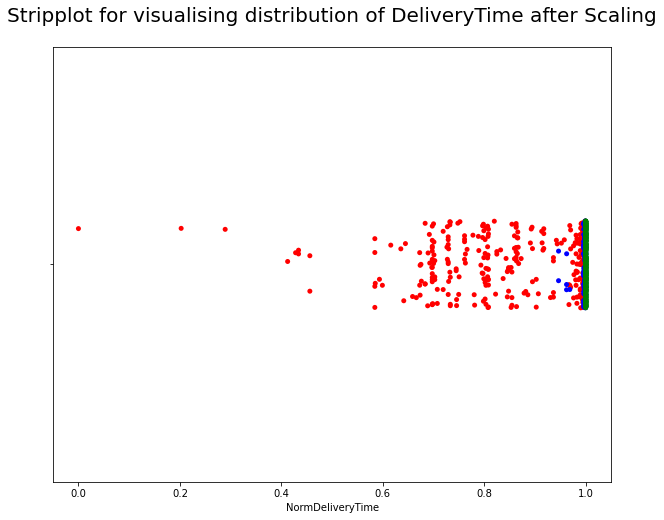

In [57]:
plt.figure(figsize = (10,8))
sns.stripplot(new[new['DeliveryTime'] < 0]['NormDeliveryTime'], color = 'red')
sns.stripplot(new[new['DeliveryTime'] > 0]['NormDeliveryTime'], color = 'blue')
sns.stripplot(new[new['DeliveryTime'] == 0]['NormDeliveryTime'], color = 'green')
plt.title("Stripplot for visualising distribution of DeliveryTime after Scaling", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [58]:
new.info()
# some null values in PercentQuantityKept
# Because of not handling 0/0 in 1 - QuantityReturned/QuantityReceived

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Vendor                   1503 non-null   int64         
 1   PurchaseOrder            1503 non-null   int64         
 2   Item                     1503 non-null   object        
 3   Description              1503 non-null   object        
 4   Quantity                 1503 non-null   float64       
 5   CancelQuantity           1503 non-null   float64       
 6   QuantityDemandedFinal    1503 non-null   float64       
 7   EnteredReceivedQuantity  1503 non-null   int64         
 8   EarlyDeliveryDate        1503 non-null   datetime64[ns]
 9   ReceivedDate             1503 non-null   datetime64[ns]
 10  DeliveryTime             1503 non-null   int64         
 11  ReturnQuantity           1503 non-null   int64         
 12  PercentQuantityReceived  1503 non-

In [59]:
# So,
new['PercentQuantityKept'].fillna(0, inplace = True)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Vendor                   1503 non-null   int64         
 1   PurchaseOrder            1503 non-null   int64         
 2   Item                     1503 non-null   object        
 3   Description              1503 non-null   object        
 4   Quantity                 1503 non-null   float64       
 5   CancelQuantity           1503 non-null   float64       
 6   QuantityDemandedFinal    1503 non-null   float64       
 7   EnteredReceivedQuantity  1503 non-null   int64         
 8   EarlyDeliveryDate        1503 non-null   datetime64[ns]
 9   ReceivedDate             1503 non-null   datetime64[ns]
 10  DeliveryTime             1503 non-null   int64         
 11  ReturnQuantity           1503 non-null   int64         
 12  PercentQuantityReceived  1503 non-

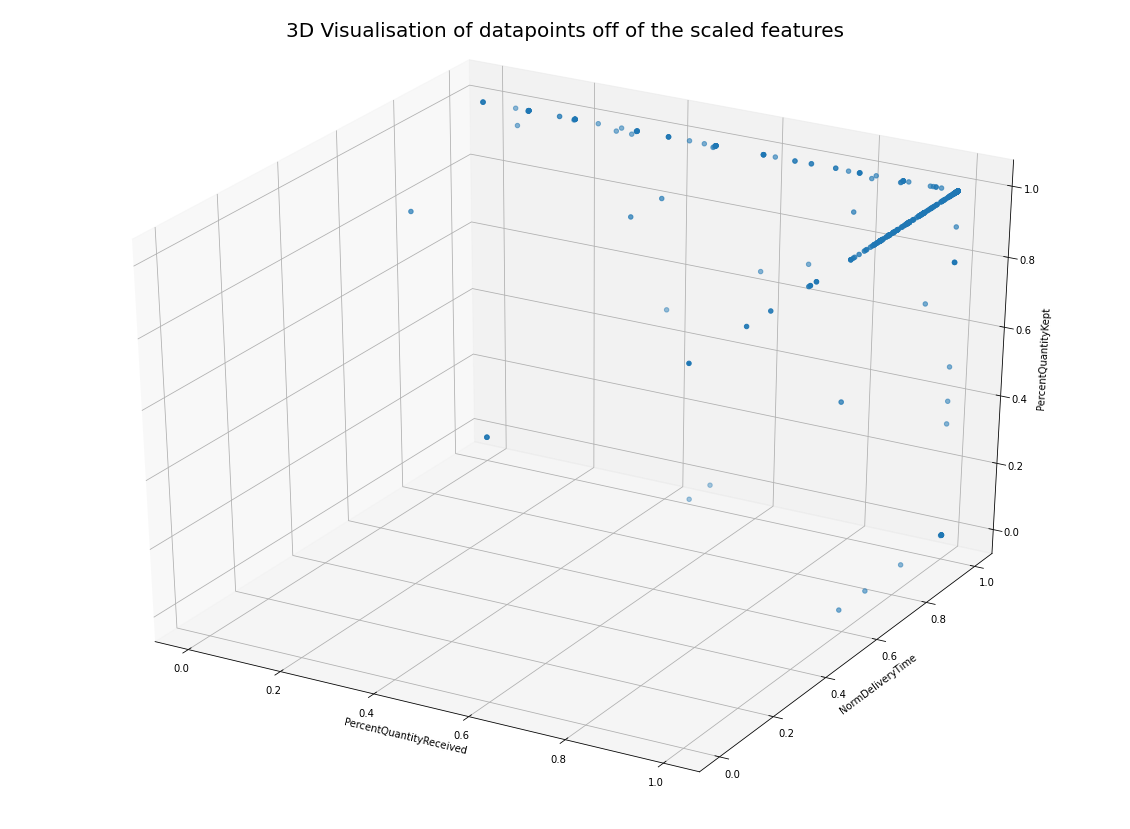

In [60]:
# Visualising datapoints off of the scaled features
fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection="3d")
ax.set_xlabel('PercentQuantityReceived')
ax.set_ylabel('NormDeliveryTime')
ax.set_zlabel('PercentQuantityKept')
ax.scatter3D(new['PercentQuantityReceived'],new['NormDeliveryTime'],new['PercentQuantityKept'])
plt.title("3D Visualisation of datapoints off of the scaled features", fontdict = {'fontsize':20}, pad = 35)
plt.show()

In [61]:
# grouping the dataframe on monthly basis, year-wise
new['ReceivedMonth'] = new['ReceivedDate'].dt.month
new['ReceivedYear'] = new['ReceivedDate'].dt.year
grouped_monthly = new.groupby(['ReceivedYear', 
                              'ReceivedMonth', 
                              'Vendor']).agg(MonthlyNormDeliveryTime = pd.NamedAgg(column = 'NormDeliveryTime', 
                                                                                   aggfunc='mean'), 
                                             MonthlyPercentReceived = pd.NamedAgg(column = 'PercentQuantityReceived', 
                                                                                   aggfunc='mean'), 
                                             MonthlyPercentKept = pd.NamedAgg(column = 'PercentQuantityKept', 
                                                                                  aggfunc='mean'), 
                                             VendorId = pd.NamedAgg(column = 'Vendor', 
                                                                                  aggfunc='first'))
grouped_monthly.head(40)

MonthlyNormDeliveryTime  \
ReceivedYear ReceivedMonth Vendor                            
2016         1             1                      1.000000   
                           5                      1.000000   
             11            1                      0.988981   
                           5                      0.999174   
                           8                      0.998347   
             12            2                      0.999711   
                           3                      0.999174   
                           6                      1.000000   
                           8                      0.999917   
2017         1             8                      0.999876   
             2             1                      1.000000   
                           8                      0.999835   
             3             2                      0.676033   
             4             1                      0.999802   
                           2                      1.000000   
                           8                      1.000000   
             5             1                      0.999504   
                           5                      1.000000   
                           8                      0.998492   
                           1005                   1.000000   
                           1006                   1.000000   
             6             1                      0.999752   
                           2                      0.999339   
                           5                      0.999752   
                           8                      0.999807   
             7             1                      0.999311   
                           5                      0.999752   
             8             1                      0.999091   
                           3                      1.000000   
                           5                      0.999787   
                           8                      0.999959   
             9             1                      0.998800   
                           2                      1.000000   
                           3                      0.999752   
                           5                      0.998815   
                           6                      0.999752   
                           8                      0.999807   
                           1021                   1.000000   
             10            1                      0.999475   
                           2                      0.999587   

                                   MonthlyPercentReceived  MonthlyPercentKept  \
ReceivedYear ReceivedMonth Vendor                                               
2016         1             1                     1.000000            1.000000   
                           5                     1.000000            1.000000   
             11            1                     1.000000            1.000000   
                           5                     1.000000            1.000000   
                           8                     1.000000            1.000000   
             12            2                     1.000000            1.000000   
                           3                     1.000000            1.000000   
                           6                     1.000000            1.000000   
                           8                     1.000000            1.000000   
2017         1             8                     1.000000            1.000000   
             2             1                     1.000000            1.000000   
                           8                     1.000000            1.000000   
             3             2                     1.000000            1.000000   
             4             1                     1.000000            1.000000   
                           2                     1.000000            1.000000   
                           8                     1.00

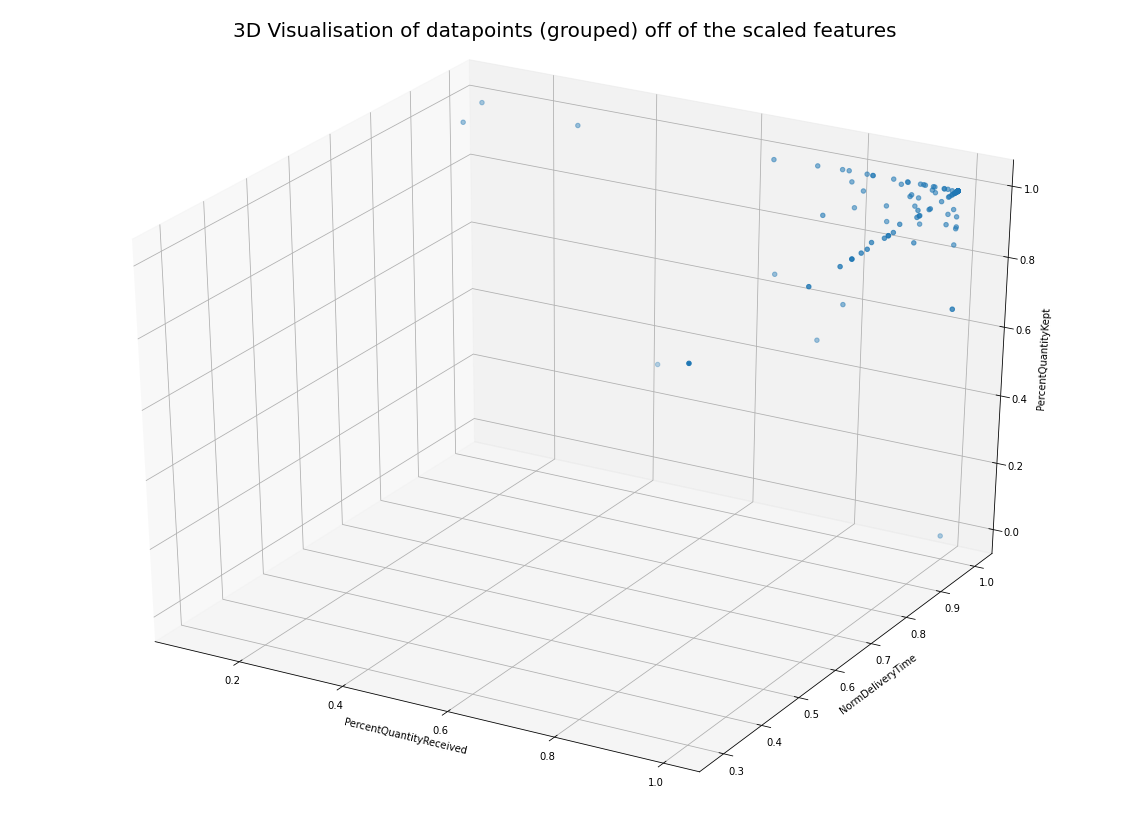

In [62]:
# Visualising datapoints off of the scaled features when grouped year-month wise
fig = plt.figure(figsize = (20,15))
ax = plt.axes(projection="3d")
ax.set_xlabel('PercentQuantityReceived')
ax.set_ylabel('NormDeliveryTime')
ax.set_zlabel('PercentQuantityKept')
ax.scatter3D(grouped_monthly['MonthlyPercentReceived'],grouped_monthly['MonthlyNormDeliveryTime'],grouped_monthly['MonthlyPercentKept'])
plt.title("3D Visualisation of datapoints (grouped) off of the scaled features", fontdict = {'fontsize':20}, pad = 35)
plt.show()

In [63]:
cls = KMeans(n_clusters = 4)
cls_assignment = cls.fit_predict(grouped_monthly[['MonthlyPercentReceived','MonthlyNormDeliveryTime','MonthlyPercentKept']])
grouped_monthly['label'] = cls_assignment

In [64]:
grouped_monthly['label'].value_counts()

0    176
3     13
2      7
1      3
Name: label, dtype: int64

In [65]:
labels ={}
test = [[1,1,1], [0,1,1], [1,0,1], [1,1,0]]
labels[cls.predict([test[0]])[0]] = "Performing"
labels[cls.predict([test[1]])[0]] = "Non-Performing: Quantity Issue"
labels[cls.predict([test[2]])[0]] = "Non-Performing: Promptness Issue"
labels[cls.predict([test[3]])[0]] = "Non-Performing: Quality Issue"

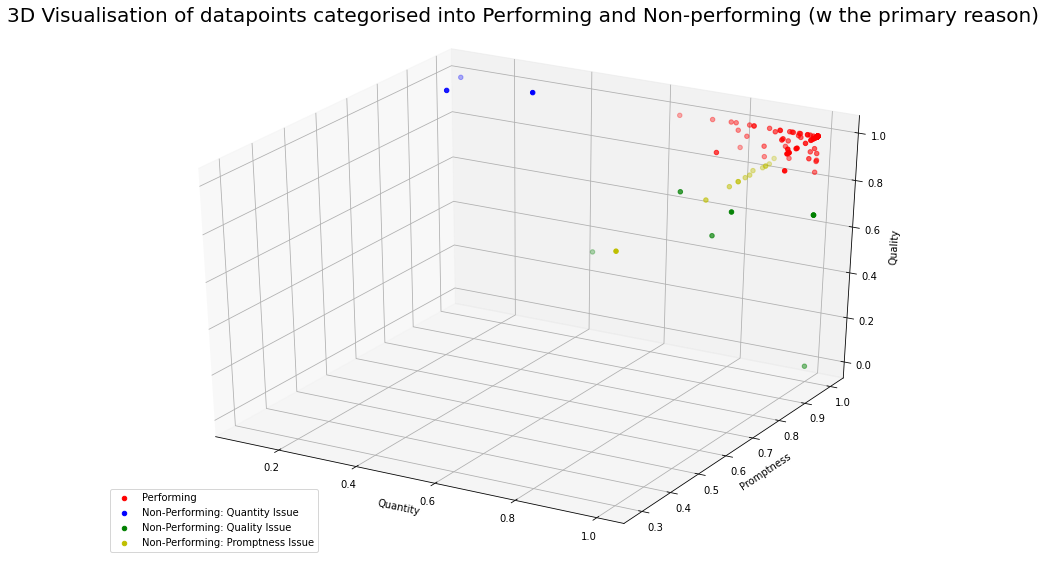

In [66]:
fig = plt.figure(figsize = (15,10))
ax = plt.axes(projection="3d")
ax.set_xlabel('Quantity')
ax.set_ylabel('Promptness')
ax.set_zlabel('Quality')
ax.scatter3D(grouped_monthly[grouped_monthly['label']==0]['MonthlyPercentReceived'], grouped_monthly[grouped_monthly['label']==0]['MonthlyNormDeliveryTime'], grouped_monthly[grouped_monthly['label']==0]['MonthlyPercentKept'],c='r')
ax.scatter3D(grouped_monthly[grouped_monthly['label']==1]['MonthlyPercentReceived'], grouped_monthly[grouped_monthly['label']==1]['MonthlyNormDeliveryTime'], grouped_monthly[grouped_monthly['label']==1]['MonthlyPercentKept'],c='b')
ax.scatter3D(grouped_monthly[grouped_monthly['label']==2]['MonthlyPercentReceived'], grouped_monthly[grouped_monthly['label']==2]['MonthlyNormDeliveryTime'], grouped_monthly[grouped_monthly['label']==2]['MonthlyPercentKept'],c='g')
ax.scatter3D(grouped_monthly[grouped_monthly['label']==3]['MonthlyPercentReceived'], grouped_monthly[grouped_monthly['label']==3]['MonthlyNormDeliveryTime'], grouped_monthly[grouped_monthly['label']==3]['MonthlyPercentKept'],c='y')
plt.legend([labels[0], labels[1], labels[2], labels[3]], loc = 3)
plt.title("3D Visualisation of datapoints categorised into Performing and Non-performing (w the primary reason)", fontdict = {'fontsize':20}, pad = 35)
plt.show()

In [67]:
clf = RandomForestClassifier()
X = grouped_monthly[['MonthlyPercentReceived','MonthlyNormDeliveryTime','MonthlyPercentKept']]
y = grouped_monthly['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
predicted = clf.predict(X_test)

In [69]:
np.unique(predicted, return_counts = True)

(array([0, 2, 3], dtype=int32), array([45,  2,  3]))

In [70]:
print("Confusion Matrix:\n", str(confusion_matrix(y_test, predicted)))
print('\n\nAccuracy Score:\n', accuracy_score(y_test, predicted)) 
print('\n\nReport:\n\n', classification_report(y_test, predicted)) 

Confusion Matrix:
 [[45  0  0]
 [ 0  2  0]
 [ 0  0  3]]


Accuracy Score:
 1.0


Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [71]:
grouped = grouped_monthly.groupby("VendorId")
vendor_output = pd.DataFrame(columns=['Vendor_ID', 'Answer', 'Performance','UnderPerformance (Quality)', 'UnderPerformance (Quantity)', 'UnderPerformance (Promptness)'])
for name, group in grouped:
    values = group['label'].value_counts() # takes all the labels a vendor has ever got
    values1 = values
    for i in range(0,4):
        if i not in values1.index: # adds the labels that are missing
            values1[i] = 0
    total = np.sum(group['label'].value_counts()) # calculates the total deliveries by that vendor 

    for i,value in enumerate(values):
        values1[values[values == value].index] = value/total # calculates the fraction in reference to each label

    maxperc_index = values1[values1 == np.max(values1)].index[0] # takes in the most occured label for that vendor
    
    if labels[maxperc_index] == 'Performing' and values1[maxperc_index] < 0.75:  #makes vendor performing if it happened >75% times
        maxperc_index = values1.drop(maxperc_index).sort_values(ascending = False).first_valid_index()
    
    vendor_output = vendor_output.append({'Vendor_ID': group['VendorId'][group['VendorId'].first_valid_index()], 'Answer': labels[maxperc_index], 'Performance': values1[cls.predict([test[0]])[0]],'UnderPerformance (Quantity)': values1[cls.predict([test[1]])[0]],'UnderPerformance (Promptness)' : values1[cls.predict([test[2]])[0]], 'UnderPerformance (Quality)': values1[cls.predict([test[3]])[0]]}, ignore_index=True)
vendor_output

,Vendor_ID,Answer,Performance,UnderPerformance (Quality),UnderPerformance (Quantity),UnderPerformance (Promptness)
0,1,Performing,0.942857,0.000000,0.0,0.057143
1,2,Performing,0.818182,0.090909,0.0,0.090909
2,3,Performing,0.933333,0.000000,0.0,0.066667
3,4,Performing,1.000000,0.000000,0.0,0.000000
4,5,Performing,0.875000,0.041667,0.0,0.083333
5,6,Performing,0.857143,0.142857,0.0,0.000000
6,7,Performing,1.000000,0.000000,0.0,0.000000
7,8,Performing,0.939394,0.030303,0.0,0.030303
8,9,Performing,1.000000,0.000000,0.0,0.000000
9,1003,Performing,0.882353,0.058824,0.0,0.058824


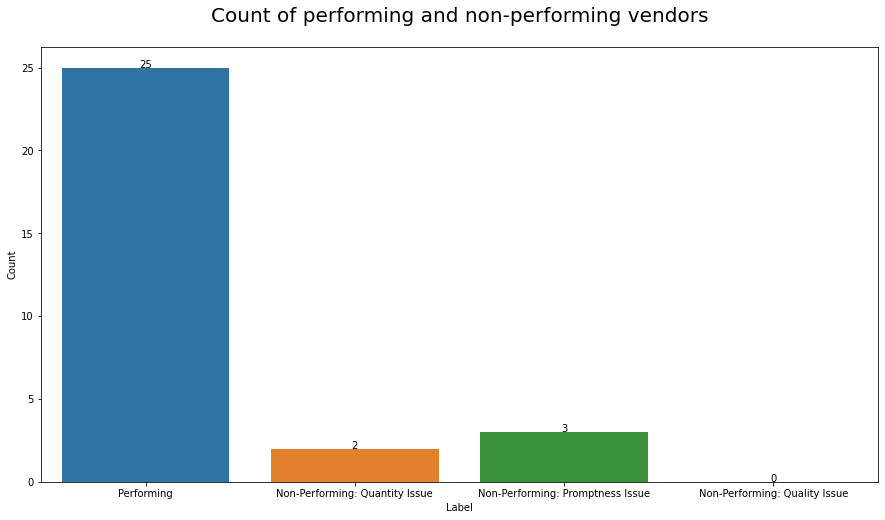

In [72]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(labels.values()), y = [len(vendor_output[vendor_output['Answer'] == x]) for x in list(labels.values())])
for i, value in enumerate([len(vendor_output[vendor_output['Answer'] == x]) for x in labels.values()]):
    ax.text(i, value, round(value ,2), color='black', ha = "center")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Count of performing and non-performing vendors", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [73]:
new.head()

,Vendor,PurchaseOrder,Item,Description,Quantity,CancelQuantity,QuantityDemandedFinal,EnteredReceivedQuantity,EarlyDeliveryDate,ReceivedDate,DeliveryTime,ReturnQuantity,PercentQuantityReceived,PercentQuantityKept,NormDeliveryTime,ReceivedMonth,ReceivedYear
0,8,1,9,SCREW BN CANC TI FT 6.5 X 25,10.0,0.0,10.0,10,2016-11-29,2016-11-29,0,0,1.0,1.0,1.000000,11,2016
1,6,2,15,PORTABLE X-RAY MACHINE,1.0,0.0,1.0,1,2016-12-03,2016-12-03,0,0,1.0,1.0,1.000000,12,2016
2,3,3,16,XPS 15,1.0,0.0,1.0,1,2016-12-05,2016-12-06,-1,0,1.0,1.0,0.999174,12,2016
3,2,4,MARQUE CURVED DOUBLE RECEPTION S,Marque Curved Double Reception Station - 124.2...,1.0,0.0,1.0,1,2016-12-08,2016-12-08,0,0,1.0,1.0,1.000000,12,2016
4,8,6,6,SURFACE ART LPS-FLEX EF 3-4 10,1.0,0.0,1.0,1,2016-12-16,2016-12-14,2,0,1.0,1.0,0.999835,12,2016


In [74]:
new['Rating (per Order)'] = 0.5 * new['PercentQuantityKept'] + 0.3 * new['NormDeliveryTime'] + 0.2 * new['PercentQuantityReceived'] 

In [75]:
regr = RandomForestRegressor()
X = new[['PercentQuantityKept','NormDeliveryTime','PercentQuantityReceived']]
y = new['Rating (per Order)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)
preds_rating = regr.predict(X_test)
print("R2 Score: %.2f" % (regr.score(X_test, y_test)*100) + "%")

R2 Score: 98.68%


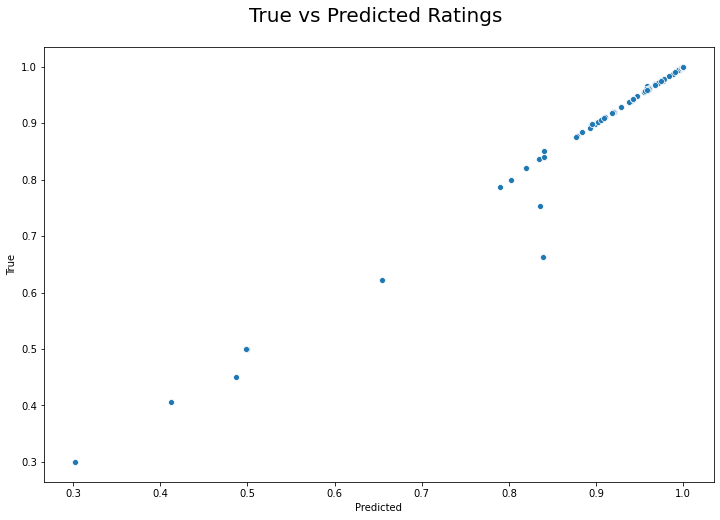

In [76]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = preds_rating, y = y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("True vs Predicted Ratings ", fontdict = {'fontsize':20}, pad = 25)
plt.show()

In [77]:
vendor_output.set_index("Vendor_ID", inplace=True)

In [78]:
vendor_output['Overall Rating (out of 5)'] = 5*(new.groupby("Vendor")['Rating (per Order)'].mean())

In [79]:
vendor_output.head()

,Answer,Performance,UnderPerformance (Quality),UnderPerformance (Quantity),UnderPerformance (Promptness),Overall Rating (out of 5)
Vendor_ID,,,,,,
1,Performing,0.942857,0.000000,0.0,0.057143,4.885208
2,Performing,0.818182,0.090909,0.0,0.090909,4.844078
3,Performing,0.933333,0.000000,0.0,0.066667,4.866855
4,Performing,1.000000,0.000000,0.0,0.000000,4.958781
5,Performing,0.875000,0.041667,0.0,0.083333,4.775988
